In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

df= pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


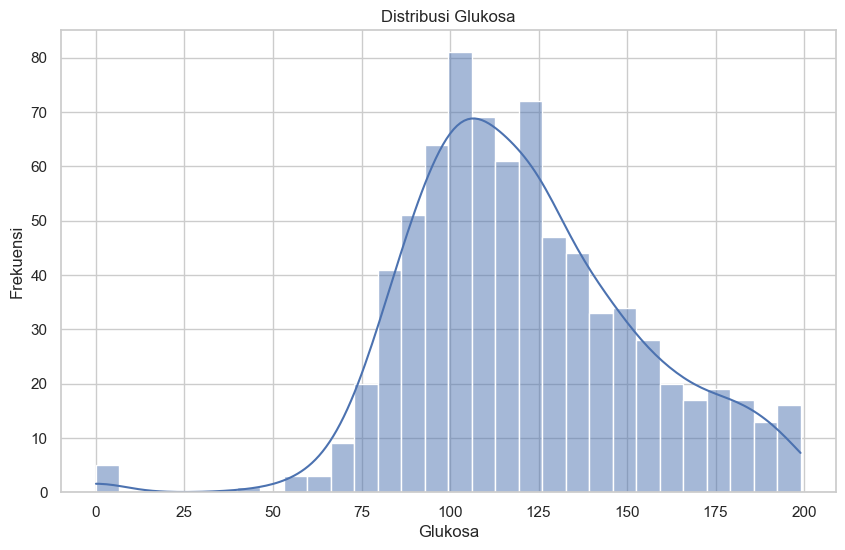

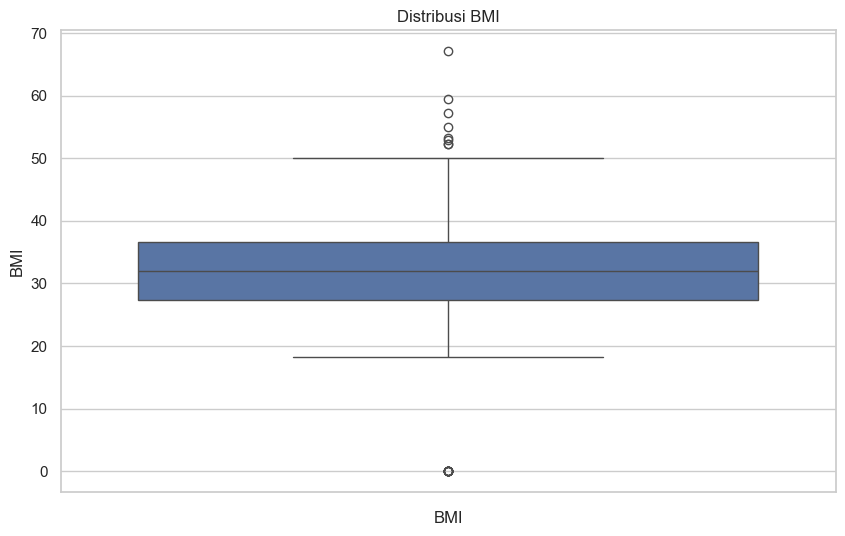

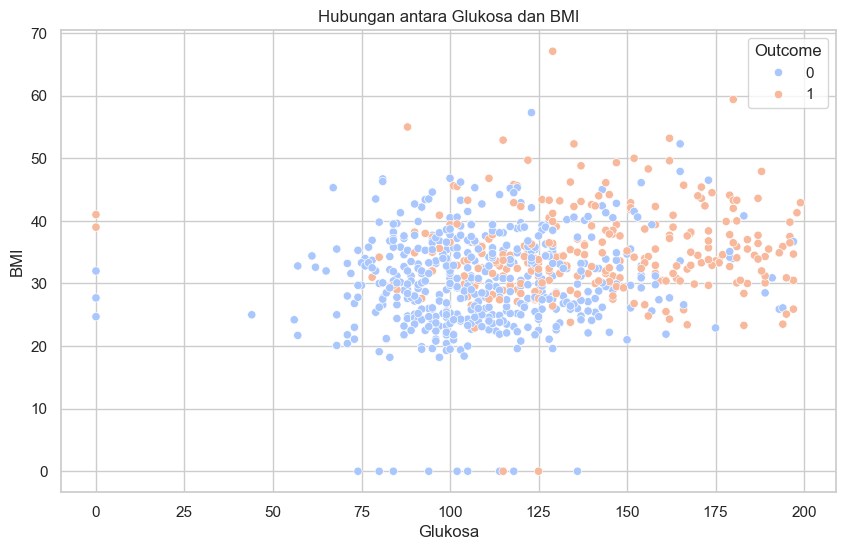

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setting gaya untuk seaborn
sns.set(style="whitegrid")

# 1. Histogram Glukosa
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title('Distribusi Glukosa')
plt.xlabel('Glukosa')
plt.ylabel('Frekuensi')
plt.show()

# 2. Boxplot BMI
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['BMI'])
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.show()

# 3. Scatter Plot antara Glukosa dan BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', data=df, hue='Outcome', palette='coolwarm')
plt.title('Hubungan antara Glukosa dan BMI')
plt.xlabel('Glukosa')
plt.ylabel('BMI')
plt.legend(title='Outcome', loc='upper right')
plt.show()

In [5]:
# Check missing values again
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
# Membuat instance dari StandardScaler
scaler = StandardScaler()

# Menerapkan scaler ke data fitur
X_scaled = scaler.fit_transform(X)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Akurasi Decision Tree: {accuracy_dt}')
print(f'Akurasi Random Forest: {accuracy_rf}')
print(f'Akurasi XGBoost: {accuracy_xgb}')

print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Laporan Klasifikasi XGBoost:\n", classification_report(y_test, y_pred_xgb))


Akurasi Decision Tree: 0.7467532467532467
Akurasi Random Forest: 0.7207792207792207
Akurasi XGBoost: 0.7207792207792207
Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Laporan Klasifikasi XGBoost:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1   

c:\Users\ASUS\anaconda3\envs\daeng\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:44:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


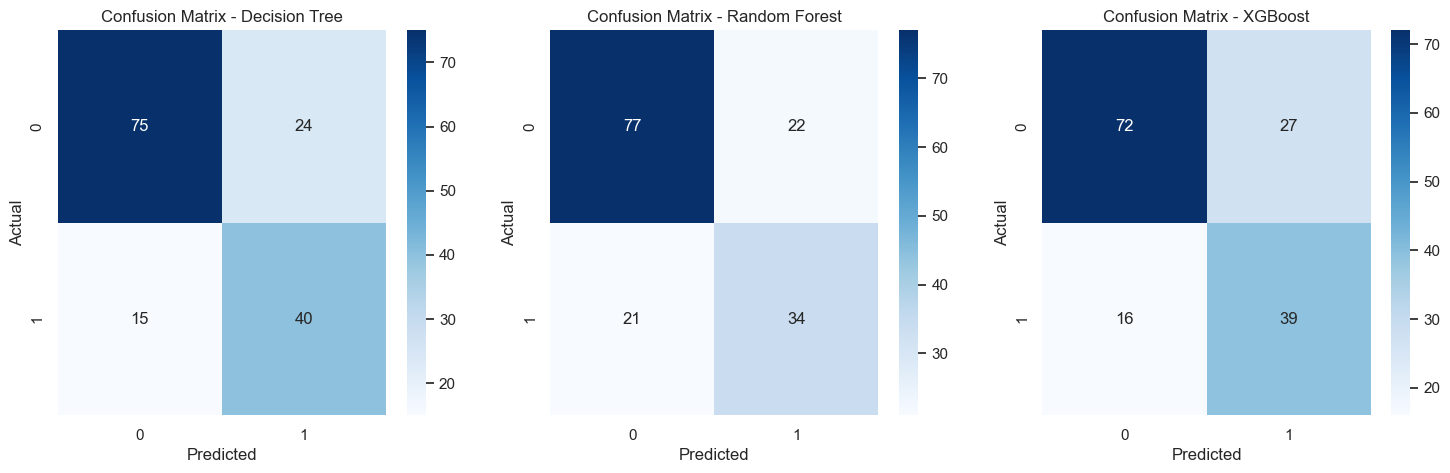

In [9]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix - Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Confusion Matrix - Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(cm_xgb, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Confusion Matrix - XGBoost')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.show()

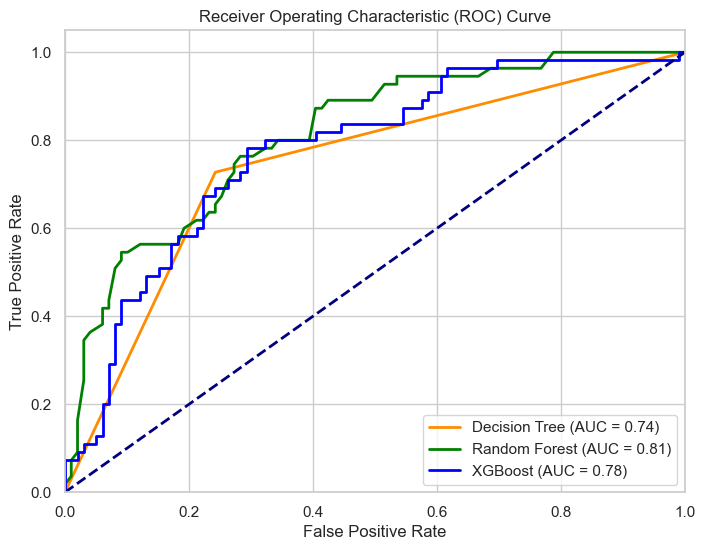

In [10]:
# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
import numpy as np

input_data = (2, 120, 70, 20, 25.0, 0.5, 30, 80)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = rf_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Pasien tidak terkena diabetes')
else:
    print('Pasien terkena diabetes')

[[-5.47918591e-01 -2.79962745e-02  4.62452528e-02 -3.36509911e-02
  -4.75818174e-01 -3.99701425e+00  8.91784379e+01  3.97862800e+00]]
[0]
Pasien tidak terkena diabetes


c:\Users\ASUS\anaconda3\envs\daeng\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\daeng\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
import pickle

filename = 'diabetes_model.sav'
pickle.dump(dt_model, open(filename, 'wb'))
